# Implementation
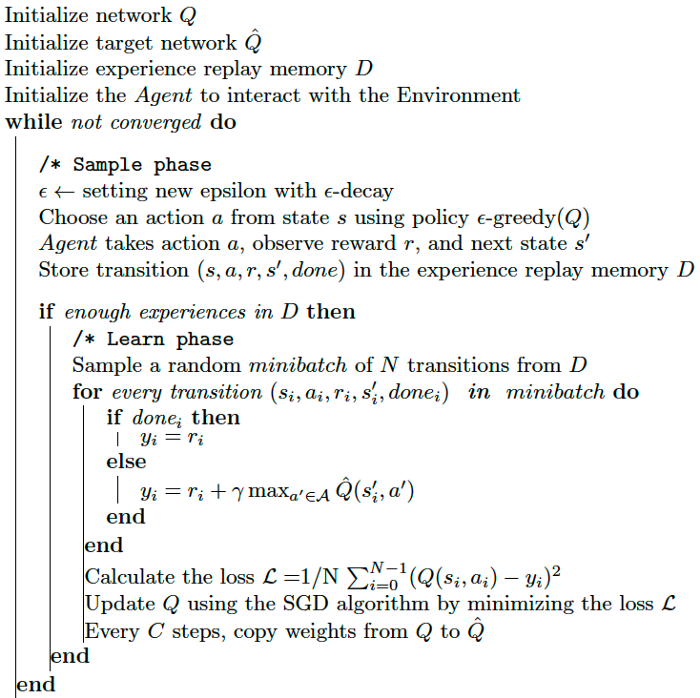

# Setup

In [ ]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars

!pip install -q tf-agents
!pip install tf-agents[reverb]

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import gym
import cv2
import reverb

import tf_agents
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.drivers import py_driver
from tf_agents.agents import DqnAgent
from tf_agents.networks import q_network
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.utils import common
from tf_agents.policies import py_tf_eager_policy

# Hyperparameters

In [ ]:
learning_rate = 1e-3
replay_memory_capacity = 1000
batch_size = 100
seed = None
num_iterations = 10_000
log_interval = 100
eval_interval = 1000
num_eval_episodes = 10

# Environment

time step
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})
action spec:
BoundedArraySpec(shape=(), dtype=dty

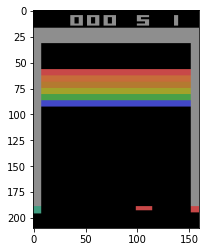

In [ ]:
env = suite_gym.load("Breakout-v0")
time_step = env.reset()
print("time step")
print(time_step)
print("action spec:")
print(env.action_spec())
print("observation spec")
print(env.observation_spec())
print("time step spec")
print(env.time_step_spec())

plt.imshow(env.render())
plt.show()

In [ ]:
train_py_env = suite_gym.load("Breakout-v0", discount=0.9, max_episode_steps=100)
eval_py_env = suite_gym.load("Breakout-v0", discount=0.9, max_episode_steps=100)
train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

print("action spec:")
print(train_env.action_spec())
print("observation spec:")
print(train_env.observation_spec())

action spec:
BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(3))
observation spec:
BoundedTensorSpec(shape=(210, 160, 3), dtype=tf.uint8, name='observation', minimum=array(0, dtype=uint8), maximum=array(255, dtype=uint8))


In [ ]:
fc_layer_params = (25, 25)

q_net = q_network.QNetwork(
        train_env.observation_spec(),
        train_env.action_spec(),
        fc_layer_params=fc_layer_params
        )

optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = DqnAgent(
        train_env.time_step_spec(),
        train_env.action_spec(),
        q_network=q_net,
        optimizer=optimizer,
        td_errors_loss_fn = "element_wise_squared_loss",
        train_step_counter=train_step_counter)

agent.initialize()

tf.Tensor([0.], shape=(1,), dtype=float32)


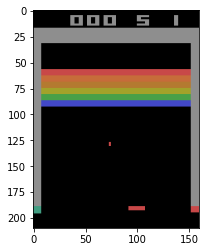

tf.Tensor([0.], shape=(1,), dtype=float32)


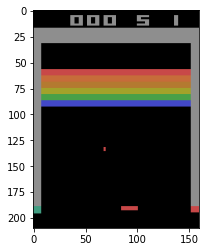

tf.Tensor([0.], shape=(1,), dtype=float32)


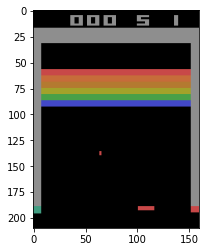

tf.Tensor([0.], shape=(1,), dtype=float32)


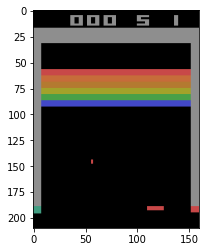

tf.Tensor([0.], shape=(1,), dtype=float32)


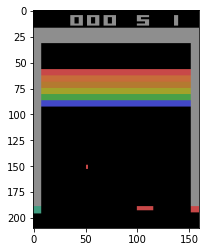

tf.Tensor([0.], shape=(1,), dtype=float32)


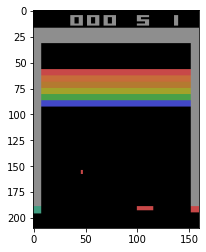

tf.Tensor([0.], shape=(1,), dtype=float32)


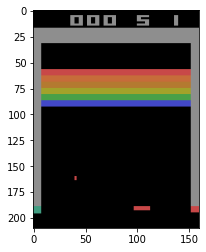

tf.Tensor([0.], shape=(1,), dtype=float32)


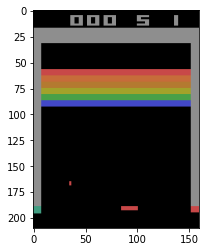

tf.Tensor([0.], shape=(1,), dtype=float32)


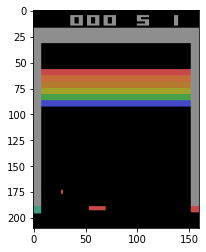

tf.Tensor([0.], shape=(1,), dtype=float32)


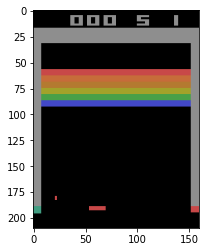

tf.Tensor([0.], shape=(1,), dtype=float32)


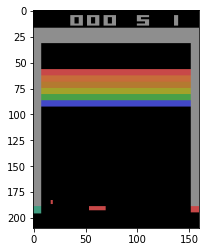

tf.Tensor([0.], shape=(1,), dtype=float32)


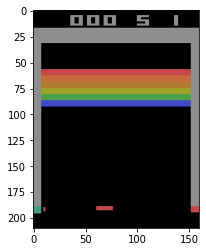

tf.Tensor([0.], shape=(1,), dtype=float32)


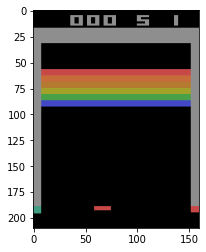

tf.Tensor([0.], shape=(1,), dtype=float32)


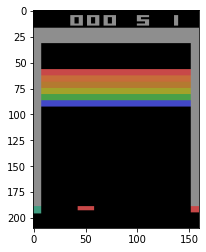

tf.Tensor([0.], shape=(1,), dtype=float32)


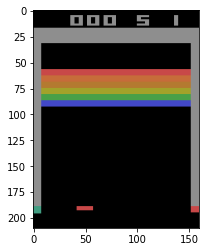

tf.Tensor([0.], shape=(1,), dtype=float32)


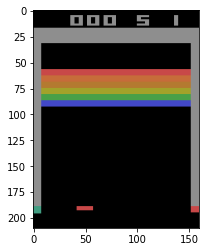

tf.Tensor([0.], shape=(1,), dtype=float32)


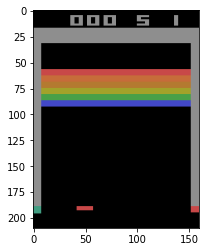

tf.Tensor([0.], shape=(1,), dtype=float32)


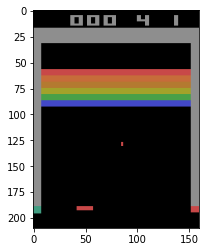

tf.Tensor([0.], shape=(1,), dtype=float32)


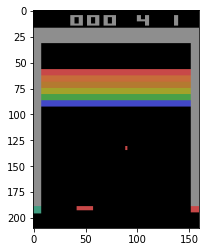

tf.Tensor([0.], shape=(1,), dtype=float32)


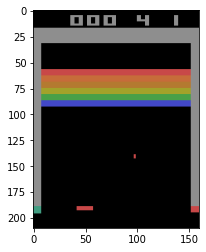

tf.Tensor([0.], shape=(1,), dtype=float32)


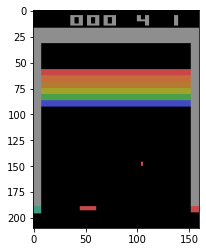

tf.Tensor([0.], shape=(1,), dtype=float32)


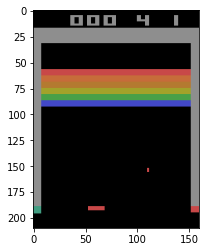

tf.Tensor([0.], shape=(1,), dtype=float32)


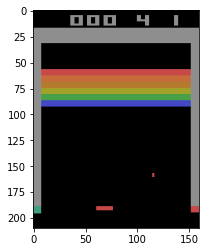

tf.Tensor([0.], shape=(1,), dtype=float32)


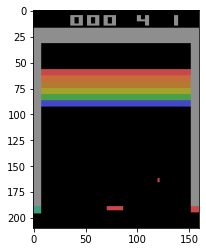

tf.Tensor([0.], shape=(1,), dtype=float32)


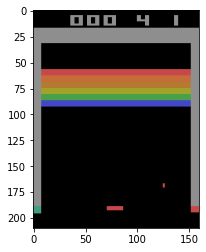

tf.Tensor([0.], shape=(1,), dtype=float32)


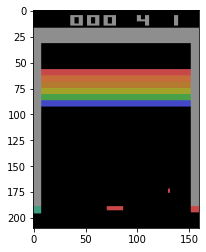

tf.Tensor([0.], shape=(1,), dtype=float32)


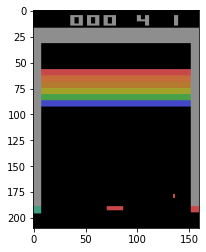

tf.Tensor([0.], shape=(1,), dtype=float32)


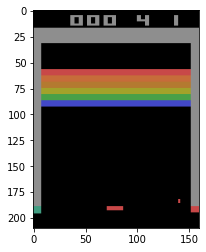

tf.Tensor([0.], shape=(1,), dtype=float32)


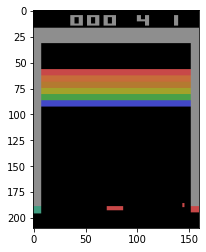

tf.Tensor([0.], shape=(1,), dtype=float32)


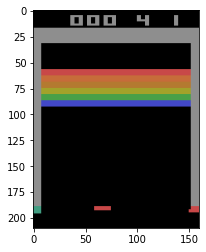

tf.Tensor([0.], shape=(1,), dtype=float32)


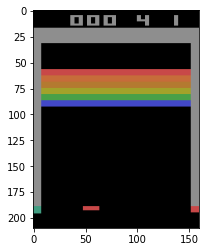

tf.Tensor([0.], shape=(1,), dtype=float32)


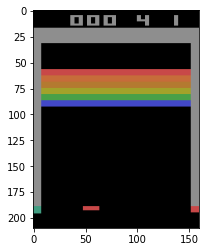

tf.Tensor([0.], shape=(1,), dtype=float32)


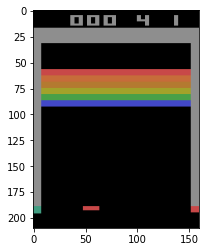

tf.Tensor([0.], shape=(1,), dtype=float32)


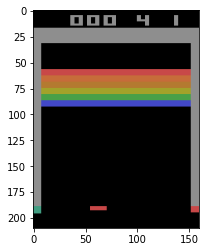

tf.Tensor([0.], shape=(1,), dtype=float32)


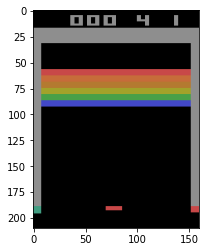

tf.Tensor([0.], shape=(1,), dtype=float32)


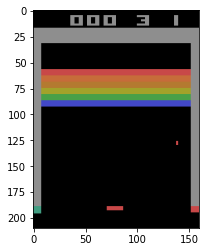

tf.Tensor([0.], shape=(1,), dtype=float32)


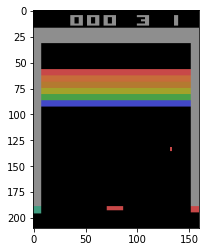

tf.Tensor([0.], shape=(1,), dtype=float32)


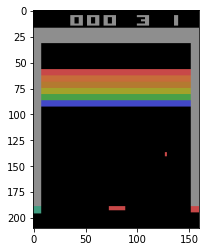

tf.Tensor([0.], shape=(1,), dtype=float32)


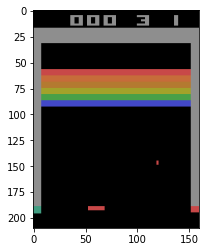

tf.Tensor([0.], shape=(1,), dtype=float32)


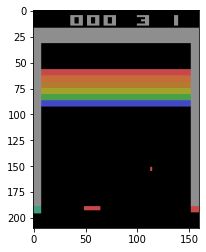

tf.Tensor([0.], shape=(1,), dtype=float32)


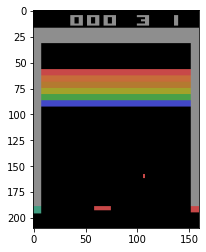

tf.Tensor([0.], shape=(1,), dtype=float32)


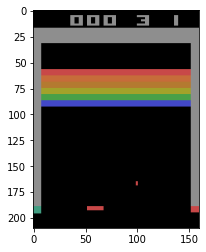

tf.Tensor([0.], shape=(1,), dtype=float32)


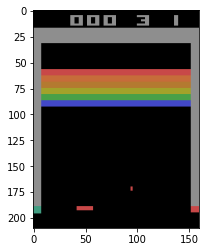

tf.Tensor([0.], shape=(1,), dtype=float32)


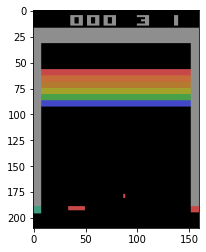

tf.Tensor([0.], shape=(1,), dtype=float32)


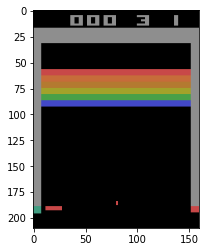

tf.Tensor([0.], shape=(1,), dtype=float32)


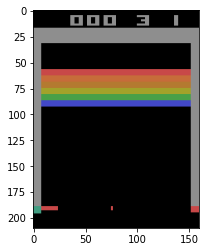

tf.Tensor([0.], shape=(1,), dtype=float32)


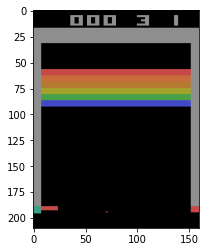

tf.Tensor([0.], shape=(1,), dtype=float32)


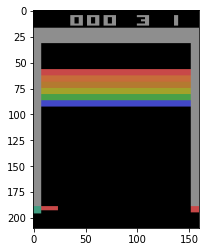

tf.Tensor([0.], shape=(1,), dtype=float32)


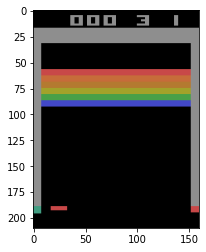

tf.Tensor([0.], shape=(1,), dtype=float32)


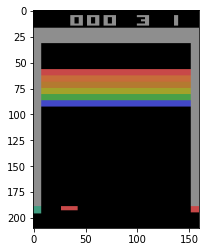

tf.Tensor([0.], shape=(1,), dtype=float32)


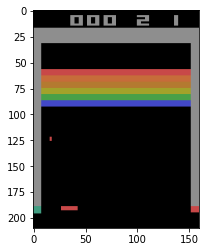

tf.Tensor([0.], shape=(1,), dtype=float32)


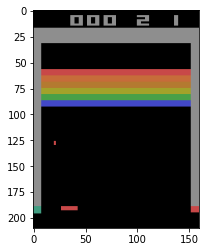

tf.Tensor([0.], shape=(1,), dtype=float32)


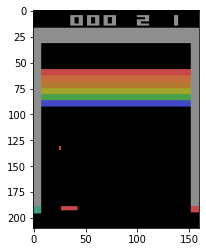

tf.Tensor([0.], shape=(1,), dtype=float32)


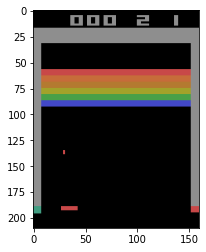

tf.Tensor([0.], shape=(1,), dtype=float32)


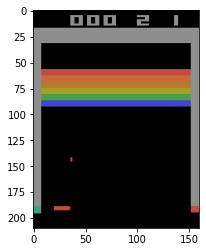

tf.Tensor([0.], shape=(1,), dtype=float32)


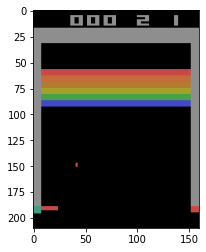

tf.Tensor([0.], shape=(1,), dtype=float32)


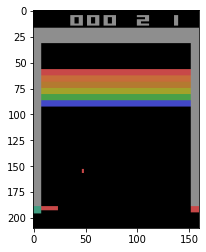

tf.Tensor([0.], shape=(1,), dtype=float32)


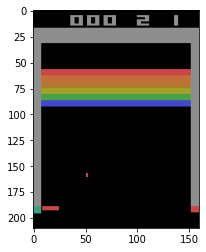

tf.Tensor([0.], shape=(1,), dtype=float32)


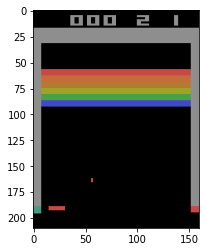

tf.Tensor([0.], shape=(1,), dtype=float32)


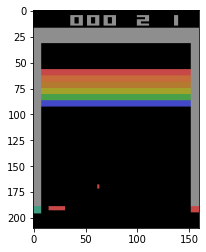

tf.Tensor([0.], shape=(1,), dtype=float32)


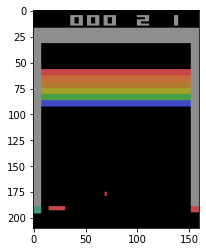

tf.Tensor([0.], shape=(1,), dtype=float32)


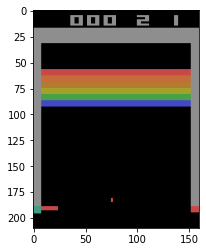

tf.Tensor([0.], shape=(1,), dtype=float32)


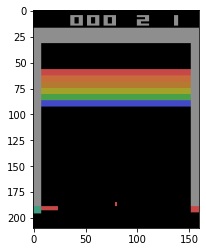

tf.Tensor([0.], shape=(1,), dtype=float32)


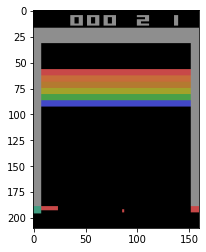

tf.Tensor([0.], shape=(1,), dtype=float32)


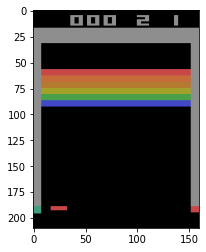

tf.Tensor([0.], shape=(1,), dtype=float32)


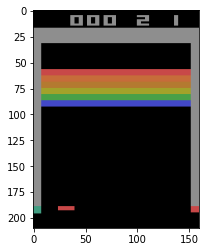

tf.Tensor([0.], shape=(1,), dtype=float32)


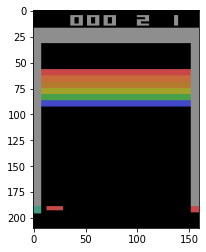

tf.Tensor([0.], shape=(1,), dtype=float32)


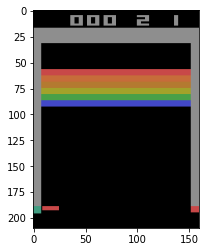

tf.Tensor([0.], shape=(1,), dtype=float32)


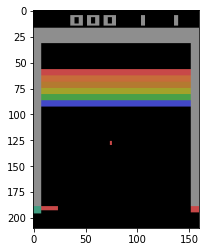

tf.Tensor([0.], shape=(1,), dtype=float32)


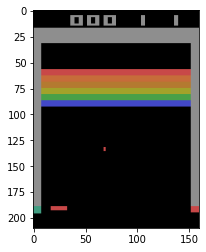

tf.Tensor([0.], shape=(1,), dtype=float32)


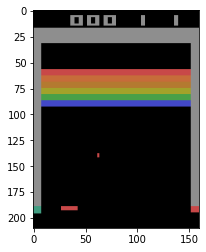

tf.Tensor([0.], shape=(1,), dtype=float32)


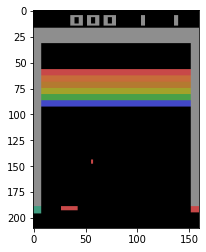

tf.Tensor([0.], shape=(1,), dtype=float32)


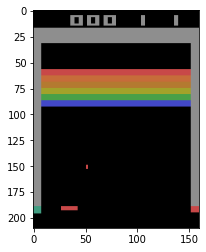

tf.Tensor([0.], shape=(1,), dtype=float32)


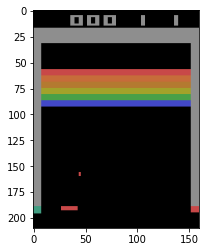

tf.Tensor([0.], shape=(1,), dtype=float32)


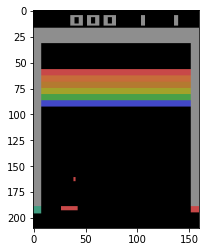

tf.Tensor([0.], shape=(1,), dtype=float32)


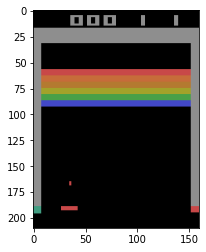

tf.Tensor([0.], shape=(1,), dtype=float32)


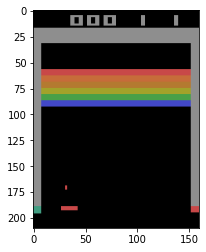

tf.Tensor([0.], shape=(1,), dtype=float32)


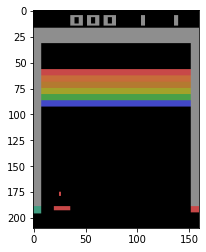

tf.Tensor([0.], shape=(1,), dtype=float32)


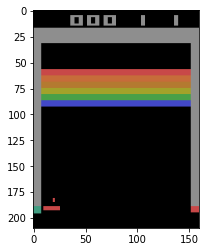

tf.Tensor([0.], shape=(1,), dtype=float32)


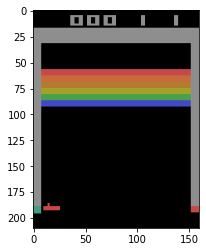

tf.Tensor([0.], shape=(1,), dtype=float32)


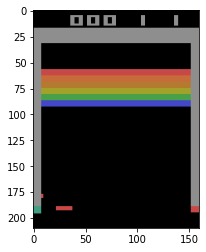

tf.Tensor([0.], shape=(1,), dtype=float32)


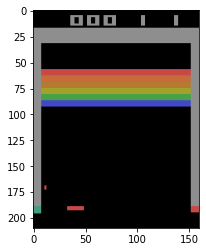

tf.Tensor([0.], shape=(1,), dtype=float32)


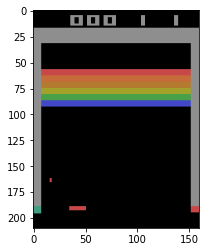

tf.Tensor([0.], shape=(1,), dtype=float32)


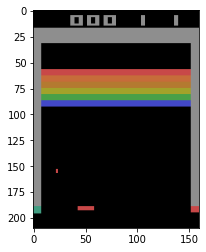

tf.Tensor([0.], shape=(1,), dtype=float32)


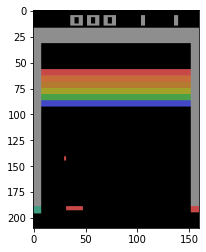

tf.Tensor([0.], shape=(1,), dtype=float32)


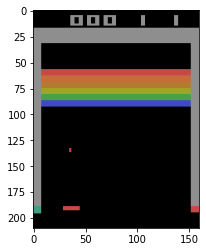

tf.Tensor([0.], shape=(1,), dtype=float32)


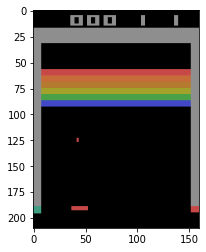

tf.Tensor([0.], shape=(1,), dtype=float32)


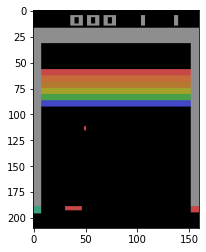

tf.Tensor([0.], shape=(1,), dtype=float32)


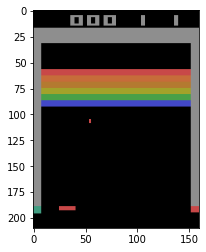

tf.Tensor([0.], shape=(1,), dtype=float32)


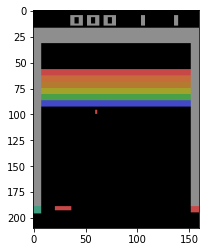

tf.Tensor([1.], shape=(1,), dtype=float32)


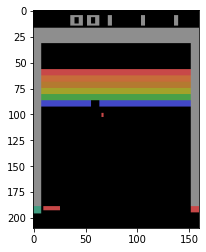

tf.Tensor([0.], shape=(1,), dtype=float32)


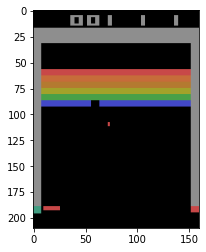

tf.Tensor([0.], shape=(1,), dtype=float32)


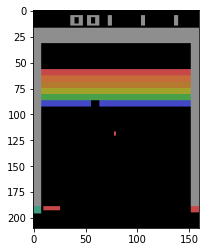

tf.Tensor([0.], shape=(1,), dtype=float32)


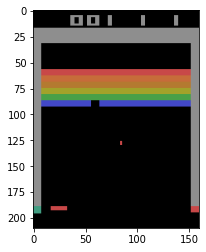

tf.Tensor([0.], shape=(1,), dtype=float32)


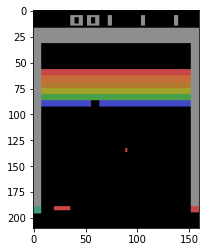

tf.Tensor([0.], shape=(1,), dtype=float32)


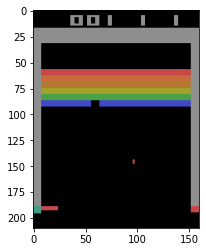

tf.Tensor([0.], shape=(1,), dtype=float32)


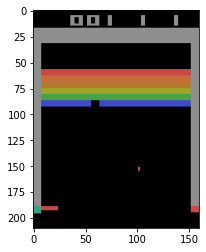

tf.Tensor([0.], shape=(1,), dtype=float32)


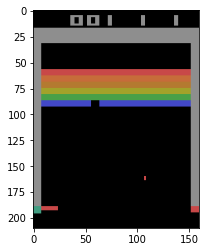

tf.Tensor([0.], shape=(1,), dtype=float32)


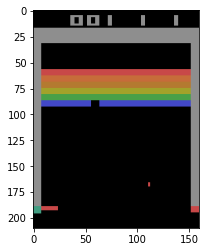

tf.Tensor([0.], shape=(1,), dtype=float32)


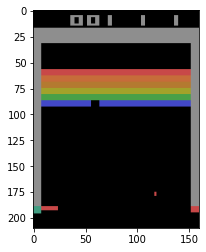

In [ ]:
random_policy = tf_agents.policies.random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())

ex_env = tf_py_environment.TFPyEnvironment(suite_gym.load("Breakout-v0"))
time_step = ex_env.reset()
for _ in range(100):
    ex_env.step(1)
    action, state, info = random_policy.action(time_step)
    time_step = ex_env.step(action)
    print(time_step.reward)
    plt.imshow(np.array(ex_env.render()).reshape(210, 160, 3))
    plt.show()

In [ ]:
policy = agent.policy
collect_policy = agent.collect_policy

In [ ]:
agent.collect_data_spec

Trajectory(
{'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0), maximum=array(3)),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(210, 160, 3), dtype=tf.uint8, name='observation', minimum=array(0, dtype=uint8), maximum=array(255, dtype=uint8)),
 'policy_info': (),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type')})

# Replay Memory

In [ ]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_memory_capacity,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = tf_agents.replay_buffers.reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

# Metrics

In [ ]:
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics

In [ ]:
tf_agents.drivers.py_driver.PyDriver(
    env,
    tf_agents.policies.py_tf_eager_policy.PyTFEagerPolicy(
      random_policy, use_tf_function=True),
    [rb_observer],
    max_steps=100).run(train_py_env.reset())

(TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1, dtype=int32)}),
 ())

In [ ]:
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(3)

iterator = iter(dataset)

In [ ]:
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step.
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

# Reset the environment.
time_step = train_py_env.reset()

# Create a driver to collect experience.
collect_driver = py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      agent.collect_policy, use_tf_function=True),
    [rb_observer],
    max_steps=1)

for _ in range(num_iterations):

  # Collect a few steps and save to the replay buffer.
  time_step, _ = collect_driver.run(time_step)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

# Reference

In [ ]:
# https://colab.research.google.com/github/GiannisMitr/DQN-Atari-Breakout/blob/master/dqn_atari_breakout.ipynb#scrollTo=RAfMgPNBvziQ
# https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_04_atari.ipynb
# https://towardsdatascience.com/creating-a-custom-environment-for-tensorflow-agent-tic-tac-toe-example-b66902f73059
# https://towardsdatascience.com/tf-agents-tutorial-a63399218309

In [ ]:
fc_layer_params = (100, 50)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

# Define a helper function to create Dense layers configured with the right
# activation and kernel initializer.
def dense_layer(num_units):
  return tf.keras.layers.Dense(
      num_units,
      activation=tf.keras.activations.relu,
      kernel_initializer=tf.keras.initializers.VarianceScaling(
          scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# its output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))
q_net = sequential.Sequential([keras.layers.Flatten()] + dense_layers + [q_values_layer])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

In [ ]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

In [ ]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

In [ ]:
example_environment = tf_py_environment.TFPyEnvironment(
    suite_gym.load("Breakout-v0"))

In [ ]:
time_step = example_environment.reset()

In [ ]:
random_policy.action(time_step)

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>, state=(), info=())